<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_3_02_LinearRegRessionSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Models

In [24]:
import matplotlib.pyplot as plt
#% matplotlib inline
import numpy as np
np.random.seed(42)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [25]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [26]:
from sklearn.model_selection import cross_val_score

## 1. Linear Regression with Randomly Generated Data

- Generate random data for X and y and plot it
- Concatenate $x0=1$ to X, representing the bias term
- Find the best coefficient values using mathematical closed form solution
- Predict the y value for new data points of `[0]` and `[2]`
- Fit a prediction line to the previously generated random data set
- Find the coefficients and the prediction for the same new data points when using `scikitlearn`'s 

income = age + education + gender + marital status + ....

income = w0*1 + w1*age + w2*education + w3*gender + w4*marital status + ....

income


income_hat_1 = w0*1 + w1*34 + w2*15 + w3*1 + w4*1

income_1

income_hat_2 = w0*1 + w1*38 + w2*12 + w3*0 + w4*1

income_2


(income_1-income_hat_1)^2 + (income_2-income_hat_2)^2 + ...


my goal is minimize this value

minimize --> (income_1-income_hat_1)^2 + (income_2-income_hat_2)^2 + ...


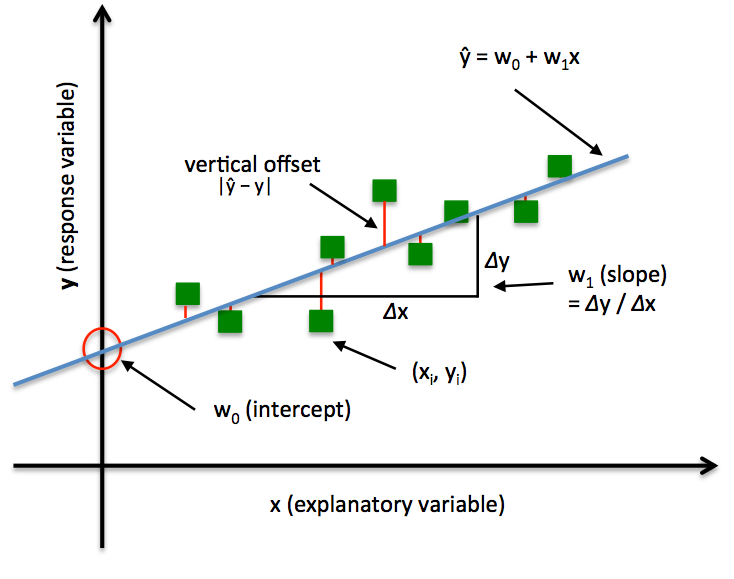

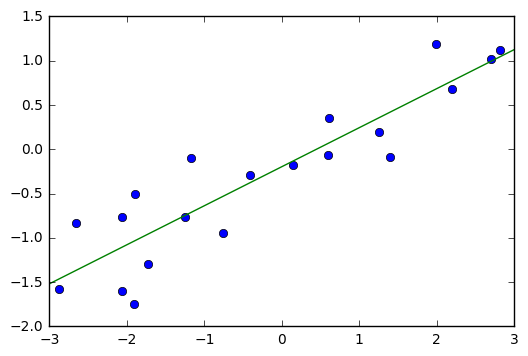

## 2. Polynomial Features

- Generate random data for X and y and plot it. this time, y will be a function of a polynomial.
- Transform the feature set using `PolynomialFeatures`
- Fit LinearRegression model to the transformed data
- Fit the data without transformation
- Plot the prediction lines for both polynomial regression and linear regression. Observe which one fits better to the dataset


In [39]:
np.random.rand(1000,1)

array([[0.95486528],
       [0.73789692],
       [0.55435405],
       [0.61172075],
       [0.41960006],
       [0.24773099],
       [0.35597268],
       [0.75784611],
       [0.01439349],
       [0.11607264],
       [0.04600264],
       [0.0407288 ],
       [0.85546058],
       [0.70365786],
       [0.47417383],
       [0.09783416],
       [0.49161588],
       [0.47347177],
       [0.17320187],
       [0.43385165],
       [0.39850473],
       [0.6158501 ],
       [0.63509365],
       [0.04530401],
       [0.37461261],
       [0.62585992],
       [0.50313626],
       [0.85648984],
       [0.65869363],
       [0.16293443],
       [0.07056875],
       [0.64241928],
       [0.02651131],
       [0.58577558],
       [0.94023024],
       [0.57547418],
       [0.38816993],
       [0.64328822],
       [0.45825289],
       [0.54561679],
       [0.94146481],
       [0.38610264],
       [0.96119056],
       [0.90535064],
       [0.19579113],
       [0.0693613 ],
       [0.100778  ],
       [0.018

In [40]:
X=2*np.random.rand(1000,1) # 

In [41]:
y = 4 + 3*X + np.random.randn(1000,1) # target variable


If I gave you only y and X,

can you estimate 4 and 3

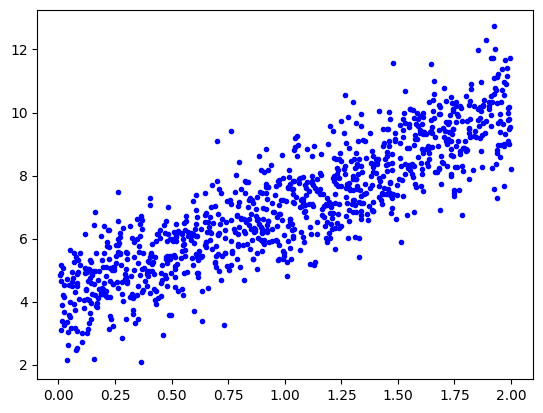

In [42]:
plt.plot(X,y,'b.')

In [43]:
y = 4 + 3*X

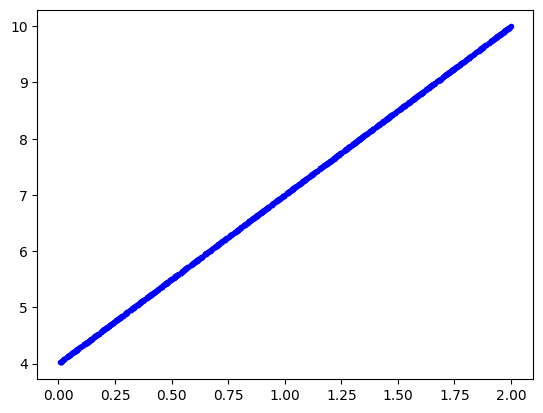

In [44]:
plt.plot(X,y,'b.')

y = 4 + 3*X

y = 4*1 + 3*X

y = [4 3] * [1 X]




X.shape

(1049, 5)

X^T.shape

(5, 1049)

y= [w0   w1] * [1 X]


y= w*X

y *  X^T = w * X * X^T

     w = y * inv(X)

y * X^T * inv(X * X^T) = w * X * X^T * inv(X * X^T)

y * X^T * inv(X * X^T) = w





In [45]:
X_b = np.c_[np.ones((1000,1)), X]


In [46]:
X_b.T

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.95173051, 0.67379158, 0.36423583, ..., 1.42806529, 1.21581043,
        0.61874544]])

In [47]:
X_b.shape, X_b.T.shape

((1000, 2), (2, 1000))

In [48]:
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [49]:
w_best

array([[4.],
       [3.]])

## 3. Boston Housing Data with Polynomials

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model

In [51]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

ImportError: ignored